best w (numpy result): [ 3.00009091  0.50009091]
min error (numpy result): 1.25115363636 

error: 15.993881818181819 | alpha: 0.001000000000000 | learning rate: 1.100000000000000
error: 11.112501245887605 | alpha: 0.001000000000000 | learning rate: 1.100000000000000
error: 4.904173700057307 | alpha: 0.001000000000000 | learning rate: 1.100000000000000
error: 1.495780331088420 | alpha: 0.001000000000000 | learning rate: 1.100000000000000
error: 1.375828233608209 | alpha: 0.000825201702859 | learning rate: 1.000781250000000
error: 1.369296137839704 | alpha: 0.000823913667101 | learning rate: 1.000000000000001
error: 1.368551141532561 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.361282665670135 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.349315554048530 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.336920939557256 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.328411416603352 | alpha: 0.0

error: 1.255622255823664 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255587712698103 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255553436504142 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255519425531066 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255485677897667 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255452191475526 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255418963969069 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255385993091604 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255353276728000 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255320812992884 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255288600161469 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.255256636524595 | alpha: 0.0008239

error: 1.251154336641754 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154331228581 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154325857252 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154320527444 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154315238836 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154309991109 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154304783947 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154299617036 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154294490066 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154289402727 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154284354714 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251154279345723 | alpha: 0.0008239

error: 1.251153636374335 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636374252 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636374170 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636374089 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636374008 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636373928 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636373848 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636373769 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636373691 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636373614 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636373536 | alpha: 0.000823913667101 | learning rate: 1.000000000000000
error: 1.251153636373459 | alpha: 0.0008239

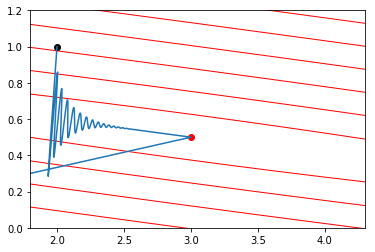

In [34]:
%matplotlib inline
import matplotlib.pylab as plt
import time
import numpy as np
from notes_utilities import pnorm_ball_line
from IPython import display

# initialize data
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
N = len(x)

# create the design matrix
A = np.vstack((np.ones(N), x)).T

# calculate values using numpy (np) 
w_best, E, rank, s = np.linalg.lstsq(A, y)
print("best w (numpy result):", w_best)

# calculate the min value using w_best
err = y-A.dot(w_best) 
E_min = np.sum(err**2) / N
print("min error (numpy result):", E_min, "\n")

def draw_pnorm():
    for i in range(0, 10):
        ln = pnorm_ball_line(mu=w_best, A = i*4*np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)
        plt.gca().add_line(ln) 



def inspect_momentum():
    alpha = 0.001
    beta = 0.95
    learning_rate = 1.1
    
    # set start position for w
    w0 = np.array([2., 1.])
    w = w0.copy()
    p = 0
   
    # set bounds and draw title
    # plt.title('alpha = '+ str(alpha) + ' beta = ' +str(beta))
    plt.xlim((1.8,4.3))
    plt.ylim((0,1.2))
    
    # draw start position
    plt.plot(w[0],w[1],'ko')
    
    # draw best position
    plt.plot(w_best[0],w_best[1],'ro')
    
    E_n = 10000
    EPOCHS = 100000
    # create a 2 * EPOCHS array
    W = np.zeros((2,EPOCHS))

    i = 0
    while True:
        # Error
        err = y-A.dot(w)
        W[:,i] = w
        
        # Mean square error
        E = np.sum(err**2) / N
        
        if E > E_n:
            alpha = alpha / learning_rate
            learning_rate = 1 + (learning_rate - 1) / 2
        elif E_n == E:
            break
        else:
            E_n = E
            print("error: %8.15f | alpha: %8.15f | learning rate: %8.15f" % (E, alpha, learning_rate))

        # Gradient
        dE = -2. * A.T.dot(err) / N
        p = dE + beta * p
 
        # Perfom one descent step
        w = w - alpha * p 
        i= i +1
    return W

# run solution
draw_pnorm()

W = inspect_momentum()

# draw solution
plt.plot(W[0,:],W[1,:])
plt.show()